In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score, precision_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Conversión de columnas
#Dataframe
df = pd.read_csv('../data/raw/gym_members_exercise_tracking.csv')
#Gender Male or female
df.insert(2, 'Gender_Male', np.where(df['Gender'] == 'Male', 1, 0))
df.insert(3, 'Gender_Female', np.where(df['Gender'] == 'Female', 1, 0))

#Workout Type true or false 
df_dummies =  pd.get_dummies(df['Workout_Type']).astype(int)
df = pd.merge(df, df_dummies, how='inner', left_index=True,right_index=True)

In [4]:
# Guardado de CSV
df.to_csv('../data/processed/gym_members_processed.csv', index=False)

# Visualizaciones

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Gender_Male                    973 non-null    int64  
 3   Gender_Female                  973 non-null    int64  
 4   Weight (kg)                    973 non-null    float64
 5   Height (m)                     973 non-null    float64
 6   Max_BPM                        973 non-null    int64  
 7   Avg_BPM                        973 non-null    int64  
 8   Resting_BPM                    973 non-null    int64  
 9   Session_Duration (hours)       973 non-null    float64
 10  Calories_Burned                973 non-null    float64
 11  Workout_Type                   973 non-null    object 
 12  Fat_Percentage                 973 non-null    flo

In [6]:
df.describe()

,Age,Gender_Male,Gender_Female,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Cardio,HIIT,Strength,Yoga
count,973.000000,973.000000,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,0.525180,0.474820,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127,0.262076,0.227133,0.265159,0.245632
std,12.180928,0.499622,0.499622,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879,0.439990,0.419194,0.441645,0.430683
min,18.000000,0.000000,0.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,0.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,1.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000,1.000000,0.000000,1.000000,0.000000
max,59.000000,1.000000,1.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['Experience_Level'].value_counts(normalize=True)

Experience_Level
2    0.417266
1    0.386434
3    0.196300
Name: proportion, dtype: float64

<Axes: >

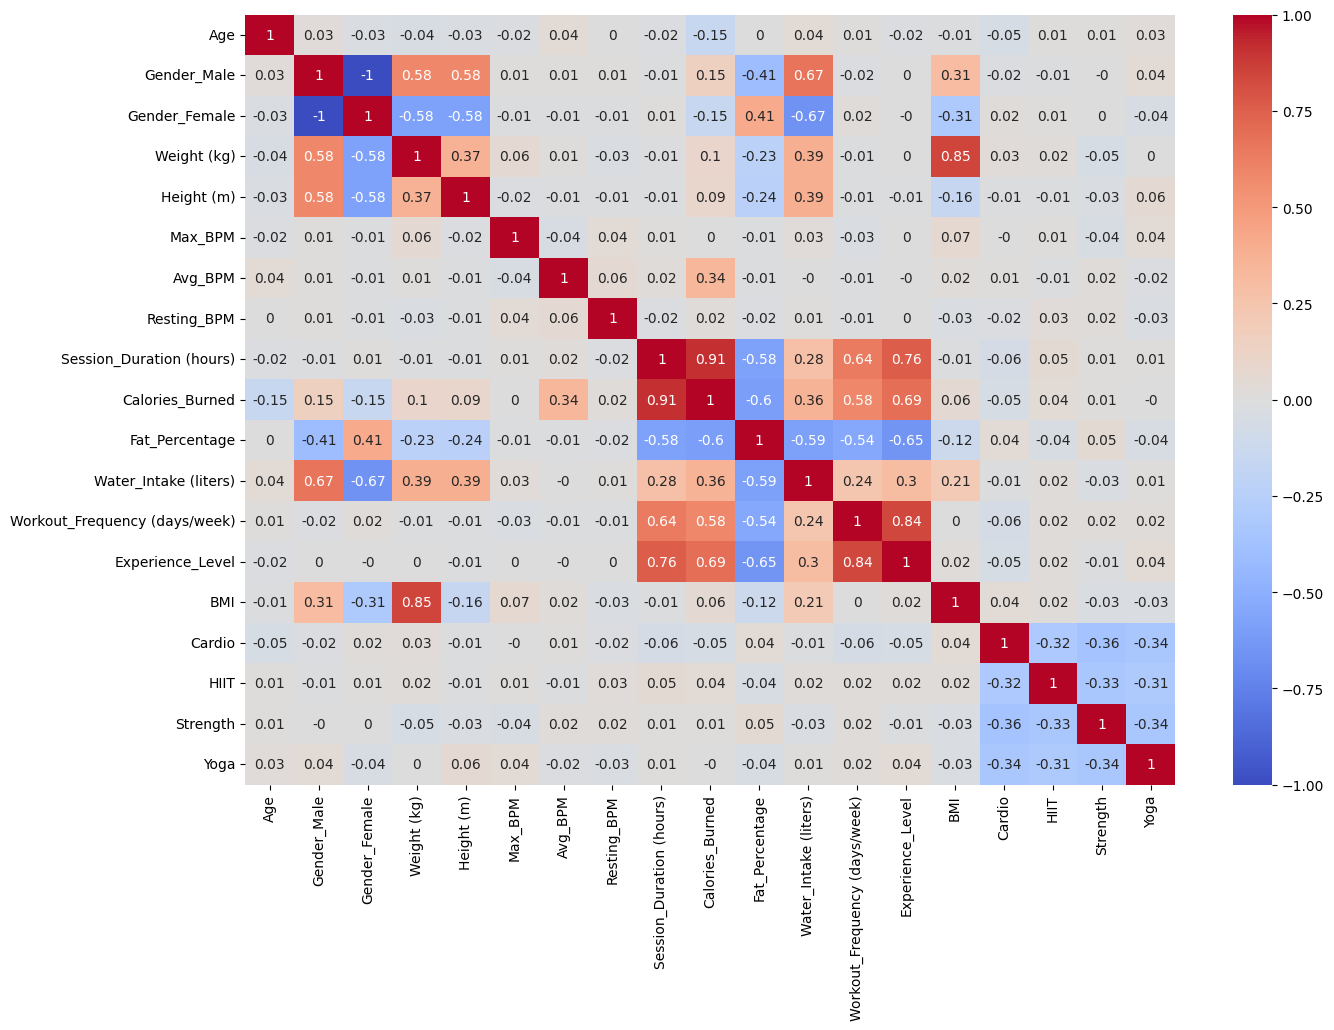

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='coolwarm')

<Axes: xlabel='Experience_Level', ylabel='Workout_Frequency (days/week)'>

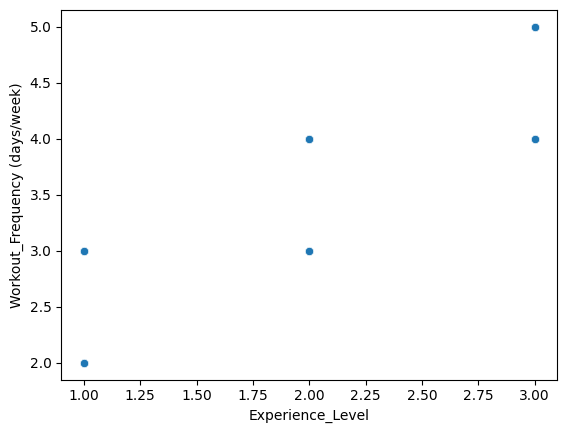

In [ ]:
sns.scatterplot(data=df, x='Experience_Level', y= 'Workout_Frequency (days/week)')

In [ ]:
X = df[['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Fat_Percentage']]
Y = df['Experience_Level']

## Pasos del proyecto
1. ¿Podemos dar solución a un problema con datos? Elige un tema.
1. Busca y consigue los datos. Vuelta al anterior punto si nos quedamos sin ideas.
1. Define tu problema de Machine Learning: clasificación/regresión, supervisado/ no supervisado, series temporales, imágenes, texto...
1. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.
1. Limpia los datos: duplicados, missings, outliers, columnas inútiles...
1. Feature engineering: transformación y creación de nuevas variables.
1. Prueba varios modelos. Itero tanto en nuevos conjuntos de datos, corrijo overfitting,
1. Analiza los resultados mediante una métrica adecuada a tu problemática.
1. Interpreta los resultados y comprende los outputs del modelo.
1. Siguientes pasos. ¿Se podría seguir enriqueciendo el modelo con otras pruebas o con otros datos?

2. Este modelo permite predecir el nivel de experiencia de un usuario en el gimnasio. Sería útil para recomendar rutinas, ajustar niveles de intensidad o frecuencia, y orientar al usuario hacia un plan más adecuado para su nivel.